In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

### landfill accumulation status quo

In [3]:
landfill_accum = pd.read_csv('landfill_pfas_assignment_final.csv')


In [4]:
landfill_accum = pd.read_csv('landfill_pfas_assignment_final.csv')
landfill_accum = gpd.GeoDataFrame(landfill_accum, geometry=gpd.points_from_xy(landfill_accum['facility_x'], landfill_accum['facility_y']), crs='EPSG:4269')

cols_to_drop = ['DDRT_ID', 'facility_x', 'facility_y', 'Address', 'Zip', 'Latitude', 'Longitude', 'Region', 'Shape', 'County', 'State', 'GeoID']
landfill_accum_sub = landfill_accum.drop(columns=cols_to_drop)

In [5]:
states = gpd.read_file('tl_2020_us_state/tl_2020_us_state.shp')
states = states[['NAME', 'STATEFP', 'geometry']]

landfills_gdf = gpd.sjoin(states, landfill_accum_sub, how='right')
landfills_gdf.drop_duplicates(inplace=True)
landfills_gdf = landfills_gdf[~landfills_gdf['NAME'].isin(['Hawaii', 'Alaska'])]
landfills_gdf['2020_pct'] = landfills_gdf['2020'].rank(pct=True)

ploting_states = landfills_gdf['NAME'].unique().tolist()
states_sub = states[states['NAME'].isin(ploting_states)]

In [6]:
landfill_accum_leachate = pd.read_csv('landfill_emission_final.csv')
landfill_accum_leachate = gpd.GeoDataFrame(landfill_accum_leachate, geometry=gpd.points_from_xy(landfill_accum_leachate['facility_x'], landfill_accum_leachate['facility_y']), crs='EPSG:4269')
landfill_accum_leachate_sub = landfill_accum_leachate.drop(columns=cols_to_drop)

leachate_gdf = gpd.sjoin(states, landfill_accum_leachate_sub, how='right')
leachate_gdf.drop_duplicates(inplace=True)
leachate_gdf = leachate_gdf[~leachate_gdf['NAME'].isin(['Hawaii', 'Alaska'])]
leachate_gdf['2020_pct'] = leachate_gdf['2020'].rank(pct=True)

In [7]:
leachate_gdf

,index_left,NAME,STATEFP,Company,geometry,2020,2021,2022,2023,2024,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2020_pct
0,1,Florida,12,Vista Landfill LLC,POINT (-81.51235 28.63838),38.410835,84.256871,147.396609,160.804299,228.382000,...,2669.635801,2800.053344,2930.216265,3060.787614,3204.618434,3351.153182,3497.844607,3644.721631,3788.987471,0.912326
1,1,Florida,12,MID-FLORIDA MATERIALS CLASS III LANDFILL,POINT (-81.58074 28.73828),11.171355,24.712118,43.274232,47.211804,67.007229,...,745.773364,781.315001,816.889537,852.559886,891.793549,931.693263,971.594393,1011.693392,1051.077208,0.713542
2,1,Florida,12,"DESOTO RECYCLING &amp; DISPOSAL, LLC",POINT (-81.67092 27.20956),60.981489,121.859038,220.199984,246.299438,337.237562,...,3432.933891,3586.400076,3740.354661,3894.142329,4061.026837,4231.349778,4401.197055,4571.267350,4741.315736,0.949653
3,1,Florida,12,Cedar Trail Landfill,POINT (-81.88471 27.89958),22.934353,42.383497,76.646593,86.836304,121.297487,...,1229.356716,1286.568047,1344.088271,1401.809494,1465.105896,1529.619895,1594.364719,1659.553376,1724.156041,0.854167
4,1,Florida,12,Enterprise Landfill &amp; Recycling,POINT (-82.13434 28.32863),21.423313,49.053779,77.109958,86.514391,133.219160,...,1587.482583,1664.581243,1741.988289,1819.637810,1904.927016,1991.829000,2078.869833,2166.365255,2252.701540,0.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,19,Washington,53,Wells Avenue Inert Waste Landfill,POINT (-120.1695 47.38608),6.411562,14.762344,24.819623,31.341683,42.521658,...,481.181037,502.671381,524.373192,545.919697,569.387159,593.473966,617.394090,641.465212,665.532276,0.585938
1163,19,Washington,53,"Caton Limited Purpose Landfill, LLC",POINT (-120.78193 46.68716),0.884222,1.968573,3.151439,3.336189,5.263991,...,48.658013,50.729155,52.803484,54.871462,57.137026,59.443855,61.746341,64.046912,66.324299,0.187500
1164,19,Washington,53,Filion Inert Demo Site,POINT (-120.46264 47.52662),4.884322,11.383626,17.351416,17.541751,29.922104,...,299.258416,311.732798,324.276621,336.706197,350.146601,363.926153,377.587870,391.267902,404.964650,0.515625
1165,19,Washington,53,Graham Road Recycling &amp; Disp,POINT (-119.02074 46.27744),5.147242,11.500965,19.901275,24.033585,34.172829,...,481.720775,504.053197,526.317674,548.515406,572.846206,597.499796,622.082602,646.612907,670.694602,0.524306


In [8]:
cols_to_remove = ['geometry', '2020_pct', 'index_left', 'NAME', 'STATEFP', 'Company']
landfills_gdf_sub = landfills_gdf.drop(columns=cols_to_remove)
leachate_gdf_sub = leachate_gdf.drop(columns=cols_to_remove)

In [9]:
leachate_gdf_sub

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,38.410835,84.256871,147.396609,160.804299,228.382000,277.431785,336.122833,395.303912,454.970560,514.860186,...,2539.679059,2669.635801,2800.053344,2930.216265,3060.787614,3204.618434,3351.153182,3497.844607,3644.721631,3788.987471
1,11.171355,24.712118,43.274232,47.211804,67.007229,81.294694,98.294307,115.372488,132.524859,149.679100,...,710.344718,745.773364,781.315001,816.889537,852.559886,891.793549,931.693263,971.594393,1011.693392,1051.077208
2,60.981489,121.859038,220.199984,246.299438,337.237562,407.834664,490.330589,572.528612,654.651600,736.443384,...,3279.850108,3432.933891,3586.400076,3740.354661,3894.142329,4061.026837,4231.349778,4401.197055,4571.267350,4741.315736
3,22.934353,42.383497,76.646593,86.836304,121.297487,145.924021,174.728060,203.361859,231.895020,260.296423,...,1172.356719,1229.356716,1286.568047,1344.088271,1401.809494,1465.105896,1529.619895,1594.364719,1659.553376,1724.156041
4,21.423313,49.053779,77.109958,86.514391,133.219160,163.020644,198.584289,234.445333,270.571997,306.811462,...,1510.694085,1587.482583,1664.581243,1741.988289,1819.637810,1904.927016,1991.829000,2078.869833,2166.365255,2252.701540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,6.411562,14.762344,24.819623,31.341683,42.521658,51.947134,63.088230,74.315263,85.632979,96.993050,...,459.698807,481.181037,502.671381,524.373192,545.919697,569.387159,593.473966,617.394090,641.465212,665.532276
1163,0.884222,1.968573,3.151439,3.336189,5.263991,6.348973,7.606092,8.841232,10.054310,11.240288,...,46.588580,48.658013,50.729155,52.803484,54.871462,57.137026,59.443855,61.746341,64.046912,66.324299
1164,4.884322,11.383626,17.351416,17.541751,29.922104,36.343391,43.851529,51.330487,58.785119,66.194176,...,286.761820,299.258416,311.732798,324.276621,336.706197,350.146601,363.926153,377.587870,391.267902,404.964650
1165,5.147242,11.500965,19.901275,24.033585,34.172829,42.723306,53.103257,63.761583,74.683401,85.817912,...,459.320277,481.720775,504.053197,526.317674,548.515406,572.846206,597.499796,622.082602,646.612907,670.694602


In [10]:
column_to_plot = '2020_pct'
years = list(range(2020, 2061))

In [11]:
landfills_gdf

,index_left,NAME,STATEFP,Company,geometry,2020,2021,2022,2023,2024,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2020_pct
0,1,Florida,12,Vista Landfill LLC,POINT (-81.51235 28.63838),0.016524,0.037416,0.057470,0.077233,0.096892,...,1.081852,1.132421,1.182525,1.232429,1.287608,1.344530,1.401065,1.457236,1.511981,0.910026
1,1,Florida,12,MID-FLORIDA MATERIALS CLASS III LANDFILL,POINT (-81.58074 28.73828),0.004806,0.010974,0.016873,0.022676,0.028430,...,0.302439,0.316222,0.329919,0.343556,0.358610,0.374111,0.389490,0.404828,0.419775,0.692374
2,1,Florida,12,"DESOTO RECYCLING &amp; DISPOSAL, LLC",POINT (-81.67092 27.20956),0.024905,0.054329,0.083754,0.112677,0.141116,...,1.378458,1.437544,1.496456,1.554951,1.618581,1.684195,1.749194,1.813858,1.878110,0.941731
3,1,Florida,12,Cedar Trail Landfill,POINT (-81.88471 27.89958),0.009485,0.019944,0.030453,0.040688,0.050644,...,0.491303,0.513177,0.535022,0.556796,0.580753,0.605458,0.630070,0.654674,0.678885,0.835476
4,1,Florida,12,Enterprise Landfill &amp; Recycling,POINT (-82.13434 28.32863),0.009080,0.020415,0.031803,0.043282,0.054827,...,0.624767,0.653821,0.682789,0.711648,0.743455,0.776249,0.808849,0.841377,0.873237,0.825193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,19,Washington,53,Wells Avenue Inert Waste Landfill,POINT (-120.1695 47.38608),0.005397,0.012457,0.019479,0.026506,0.033543,...,0.364107,0.379691,0.395329,0.410757,0.427606,0.445085,0.462324,0.479560,0.496683,0.718937
1163,19,Washington,53,"Caton Limited Purpose Landfill, LLC",POINT (-120.78193 46.68716),0.000566,0.001218,0.001875,0.002517,0.003146,...,0.027884,0.029016,0.030142,0.031256,0.032481,0.033744,0.034994,0.036234,0.037452,0.200514
1164,19,Washington,53,Filion Inert Demo Site,POINT (-120.46264 47.52662),0.002416,0.005679,0.008850,0.011985,0.015086,...,0.144937,0.150721,0.156499,0.162190,0.168358,0.174749,0.181044,0.187304,0.193534,0.528706
1165,19,Washington,53,Graham Road Recycling &amp; Disp,POINT (-119.02074 46.27744),0.004407,0.010197,0.016091,0.022147,0.028351,...,0.382042,0.398986,0.415755,0.432352,0.450611,0.469344,0.487875,0.506222,0.524093,0.669237


C:\Users\mchen48\AppData\Local\Temp\ipykernel_2476\2690369635.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


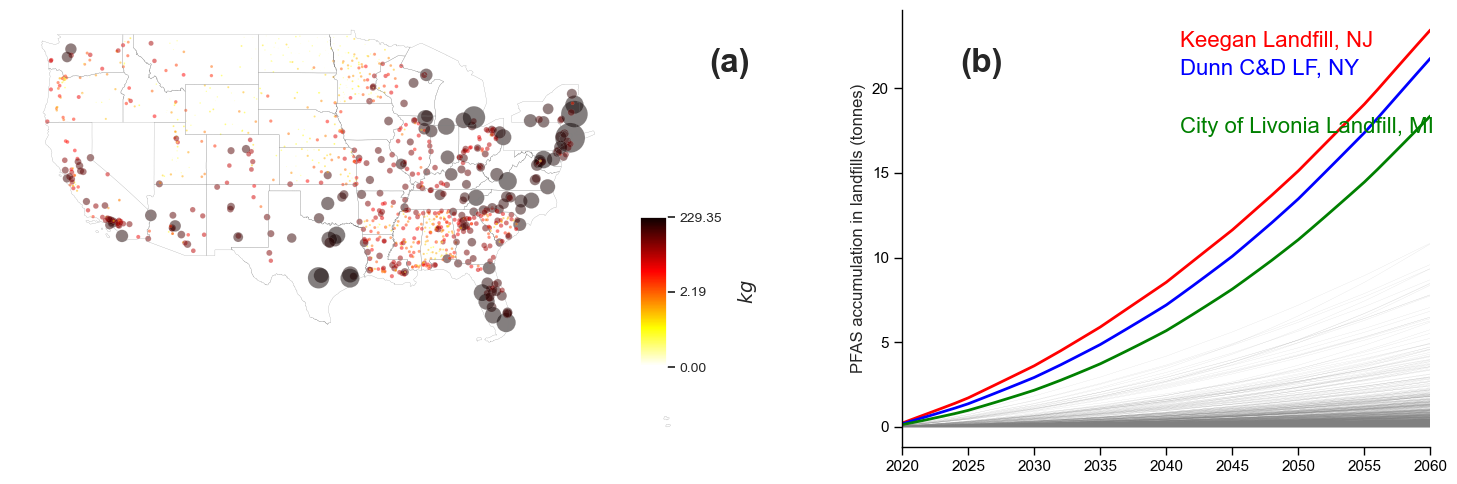

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
landfills_gdf.plot(column=column_to_plot, ax=ax0, cmap='hot_r', edgecolor='white', linewidth=0.1, markersize=landfills_gdf['2020']*2000, alpha=0.5)
states_sub.boundary.plot(ax=ax0, color='grey', linewidth=0.15)
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=landfills_gdf[column_to_plot].min(), vmax=landfills_gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.51, 0.25, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.percentile(landfills_gdf['2020']*1000, [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$kg$', fontsize=14, labelpad=10)
ax0.set_axis_off()

highlighted = {
    340: 'Keegan Landfill, NJ',
    351: 'Dunn C&D LF, NY',
    482: 'City of Livonia Landfill, MI'
}
highlight_colors = {
    340: 'red',
    351: 'blue',
    482: 'green'
}

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in landfills_gdf_sub.iterrows():
    if index in highlighted:
        if index == 0:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-27], row.iloc[-1]-2),
                fontsize=16, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-1]-1),
                fontsize=16, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('PFAS accumulation in landfills (tonnes)')
ax1.set_xlim([2020, 2060])
# make the yscale log
# ax1.set_yscale('log')

fig.text(0.56, 0.84, '(a)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.7, 0.84, '(b)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()

C:\Users\mchen48\AppData\Local\Temp\ipykernel_2476\1483935245.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


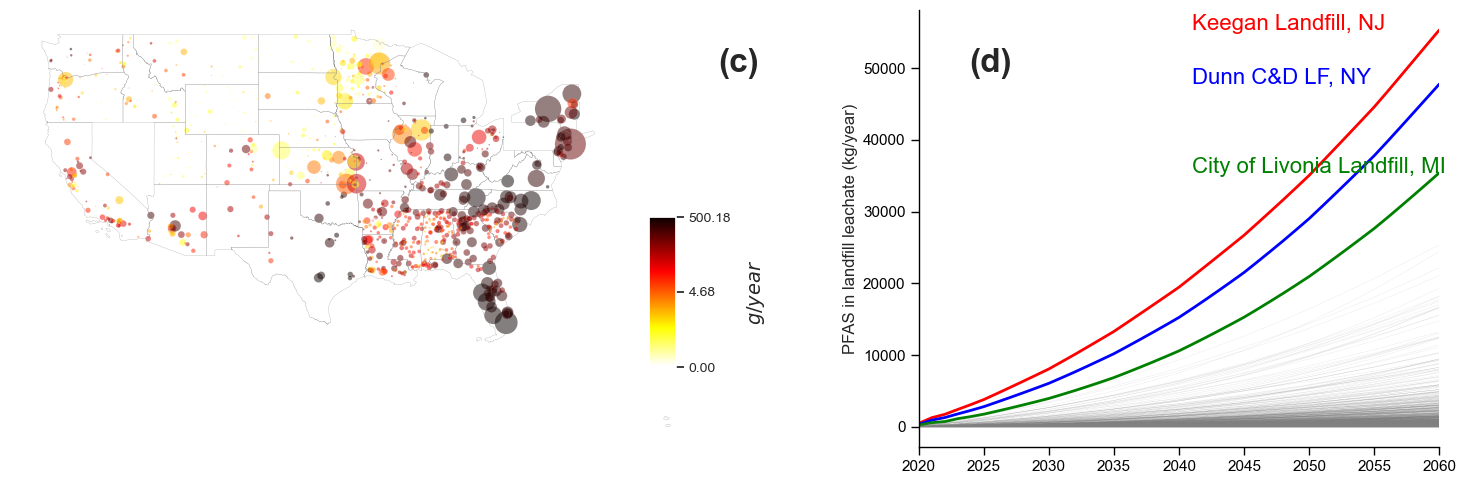

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.8, 1.2])

ax0 = plt.subplot(gs[0])
leachate_gdf.plot(column=column_to_plot, ax=ax0, cmap='hot_r', edgecolor='white', linewidth=0.1, markersize=leachate_gdf['2020']*1, alpha=0.5)
states_sub.boundary.plot(ax=ax0, color='grey', linewidth=0.15)
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=leachate_gdf[column_to_plot].min(), vmax=leachate_gdf[column_to_plot].max()))
sm._A = []  # Dummy array for the ScalarMappable
cax = fig.add_axes([0.51, 0.25, 0.015, 0.3])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, ax=ax0, fraction=0.03, pad=0.004, shrink=0.25, aspect=10, orientation='vertical', cax=cax)
percentiles = [0, 0.5, 1]  # Min, median, max percentiles
actual_values = np.nanpercentile(leachate_gdf['2020'], [p * 100 for p in percentiles])
cbar.set_ticks(percentiles)
cbar.set_ticklabels([f"{val:.2f}" for val in actual_values])
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor('white')
cbar.set_label(r'$g/year$', fontsize=14, labelpad=10)
ax0.set_axis_off()

highlighted = {
    340: 'Keegan Landfill, NJ',
    351: 'Dunn C&D LF, NY',
    482: 'City of Livonia Landfill, MI'
}
highlight_colors = {
    340: 'red',
    351: 'blue',
    482: 'green'
}

sns.set(style='white', font_scale=1)  # Set style and font size
ax1 = plt.subplot(gs[1])
for index, row in leachate_gdf_sub.iterrows():
    if index in highlighted:
        if index == 1138:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-28], row.iloc[-1]+3),
                fontsize=16, color=highlight_colors[index])
        elif index == 1934:
            ax1.plot(years, row, linewidth=2.5, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-30], row.iloc[-1]-8),
                fontsize=16, color=highlight_colors[index])
        else:
            ax1.plot(years, row, linewidth=2, label=highlighted[index], color=highlight_colors[index])
            ax1.annotate(highlighted[index], xy=(years[-1], row.iloc[-1]), xytext=(years[-20], row.iloc[-1]-15),
                fontsize=16, color=highlight_colors[index])
    else:
        ax1.plot(years, row, color='grey', linewidth=0.05)  # Regular lines
ax1.set_facecolor('white')  # Set the background color to white
for spine in ax1.spines.values():  # Set color and linewidth of the spines
    spine.set_color('black')
    spine.set_linewidth(1)
ax1.tick_params(axis='x', colors='black', direction='out', length=6, width=1)
ax1.tick_params(axis='y', colors='black', direction='out', length=6, width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylabel('PFAS emission throught landfill leachate & gas (g/year)')
ax1.set_xlim([2020, 2060])
fig.text(0.56, 0.84, '(c)', ha='center', fontsize=24, fontweight='bold')
fig.text(0.7, 0.84, '(d)', ha='center', fontsize=24, fontweight='bold')

plt.tight_layout()